# Hodgkin-Huxley Model

*by Younginn Park*

A model for neuronal activity given a function for input current.

---

Definitions:
- $V$ - membrane potential (voltage)
- $C$ - electric capacitance ($1\mu F/cm^2)$
- $g_{K}$, $g_{Na}$, $g_{L}$ - maximum conductance of ions ($K^+, Na^+$ and the rest, respectively) - in reality it varies through time (via e.g. chemical changes), but this simulation will be simplified and the value will be set to constant, let $g_K = 30 ms/cm^2$, $g_{Na} = 120 ms/cm^2$, $g_L = 0.1 ms/cm^2$
- $V_{K}$, $V_{Na}$, $V_{L}$ - reversal potential of ions ($K^+, Na^+$ and the rest, respectively), varies in time in reality, but practically constant, let $V_K = -80 mV$, $V_{Na} = 50 mV$, $V_L = -65 mV$
- $n, m, h$ - gating variables, they are dependent on time and voltage (membrane potential), they have values $0 \leq n,m,h \leq 1$
- $\alpha, \beta$ - coefficients that depend on voltage (membrane potential), for each of the gating variables
- $I_{app}$ - applied input current

Equations:
$$
\begin{cases}
C \frac{dV}{dt} = - g_K n^4(V - V_k) - g_{Na} m^3h(V - V_{Na}) - g_L(V - V_L) + I_{app} \\
\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n \\
\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m \\
\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h \\
\end{cases}
\begin{cases}
\alpha_n = \frac{0.1 (V + 55)}{1 - e^{-0.1 (V + 55)}} \\
\beta_n = 0.125 e ^{-0.0125 (V + 65)} \\
\alpha_m = \frac{0.1 (V + 40)}{1 - e^{-0.1 (V + 40)}} \\
\beta_m = 4 e ^{-0.05 (V + 65)} \\
\alpha_h =  0.07 e^{-0.05 (V + 65)} \\
\beta_h = \frac{1}{1 + e^{-0.1 (V + 35)}} \\
\end{cases}
$$

Task:
- $I_{app}$ is the input current - the task is to experiment with different inputs, like a current with a constant value and alternating current (e.g. $sin(\omega t)$)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def hodgkin_huxley(I_app, time_end=100, dt=0.01):
    # Constants
    C = 1.0             # Membrane capacitance (uF/cm^2)
    g_K = 30.0          # Maximum conductance for K+ (mS/cm^2)
    g_Na = 120.0        # Maximum conductance for Na+ (mS/cm^2)
    g_L = 0.1           # Maximum conductance for Leak channels (mS/cm^2)
    V_K = -80.0         # K+ reversal potential (mV)
    V_Na = 50.0         # Na+ reversal potential (mV)
    V_L = -65.0         # Leak channel reversal potential (mV)

    # Time variables
    time = np.arange(0, time_end, dt)

    # Initialize state variables
    V = -65.0           # Initial membrane potential (mV)
    n = 0.              # Initial n gate variable
    m = 0.              # Initial m gate variable
    h = 0.              # Initial h gate variable

    # Arrays to store values for plotting
    V_trace = []
    I_trace = []

    # Alpha and beta functions
    def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))
    def beta_n(V): return 0.125 * np.exp(-0.0125 * (V + 65))

    def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))
    def beta_m(V): return 4 * np.exp(-0.05 * (V + 65))

    def alpha_h(V): return 0.07 * np.exp(-0.05 * (V + 65))
    def beta_h(V): return 1 / (1 + np.exp(-0.1 * (V + 35)))

    # Simulation
    for t in time:
        # Apply current
        I = I_app(t)   # I_app as a function of time
        I_trace.append(I)

        # Update gating variables
        dn_dt = alpha_n(V) * (1 - n) - beta_n(V) * n
        dm_dt = alpha_m(V) * (1 - m) - beta_m(V) * m
        dh_dt = alpha_h(V) * (1 - h) - beta_h(V) * h
        n += dn_dt * dt
        m += dm_dt * dt
        h += dh_dt * dt

        # Calculate ion currents
        I_K = g_K * (n ** 4) * (V - V_K)
        I_Na = g_Na * (m ** 3) * h * (V - V_Na)
        I_L = g_L * (V - V_L)

        # Update membrane potential
        dV_dt = (I - I_K - I_Na - I_L) / C
        V += dV_dt * dt

        # Store membrane potential
        V_trace.append(V)

    # Plot results
    plt.figure(figsize=(12, 6))

    # Membrane Potential
    plt.subplot(2, 1, 1)
    plt.plot(time, V_trace, label="Membrane Potential V (mV)")
    plt.ylabel("V (mV)")
    plt.title("Hodgkin-Huxley Neuron Model")
    plt.legend(loc="upper right")

    # Input Current
    plt.subplot(2, 1, 2)
    plt.plot(time, I_trace, label="Input Current I_app", color="orange")
    plt.xlabel("Time (ms)")
    plt.ylabel("I_app")
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()



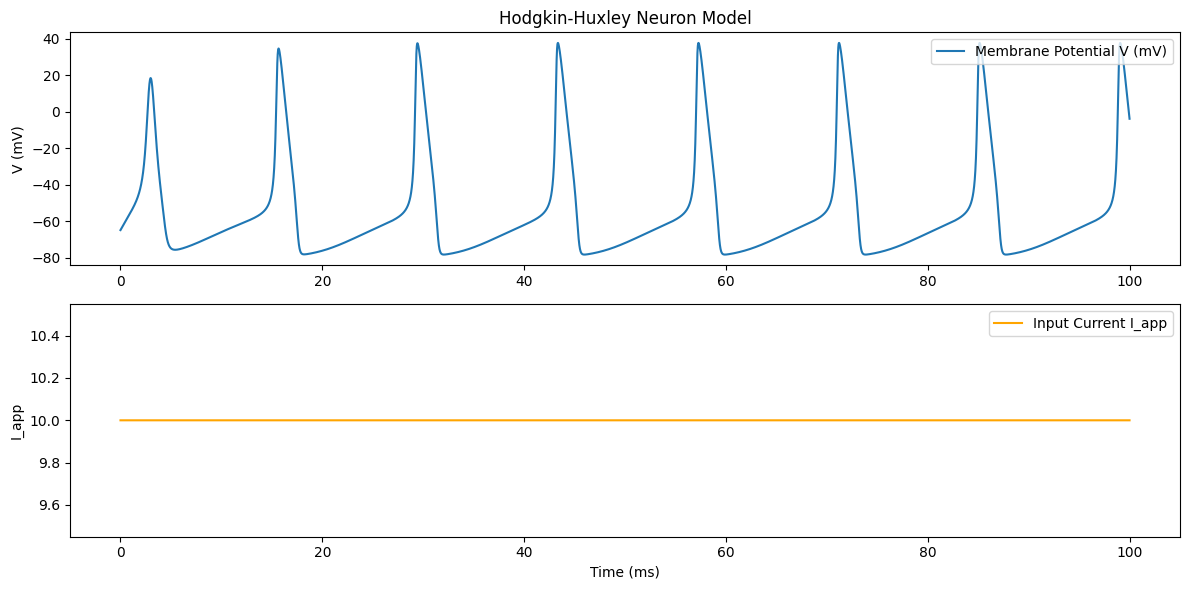

In [ ]:

# Constant input current
I_constant = lambda t: 10.0
hodgkin_huxley(I_app=I_constant, time_end=100)


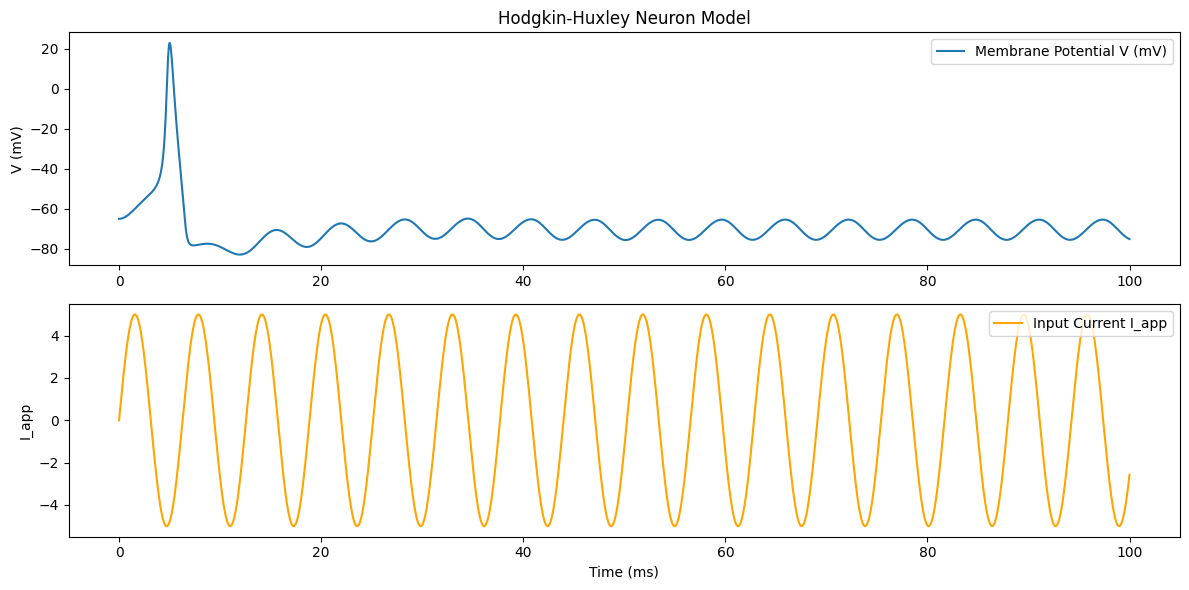

In [ ]:

# Alternating current (sinusoidal input)
amp = 5
freq = 1
I_sinusoidal = lambda t: amp * np.sin(freq * t)
hodgkin_huxley(I_app=I_sinusoidal, time_end=100)


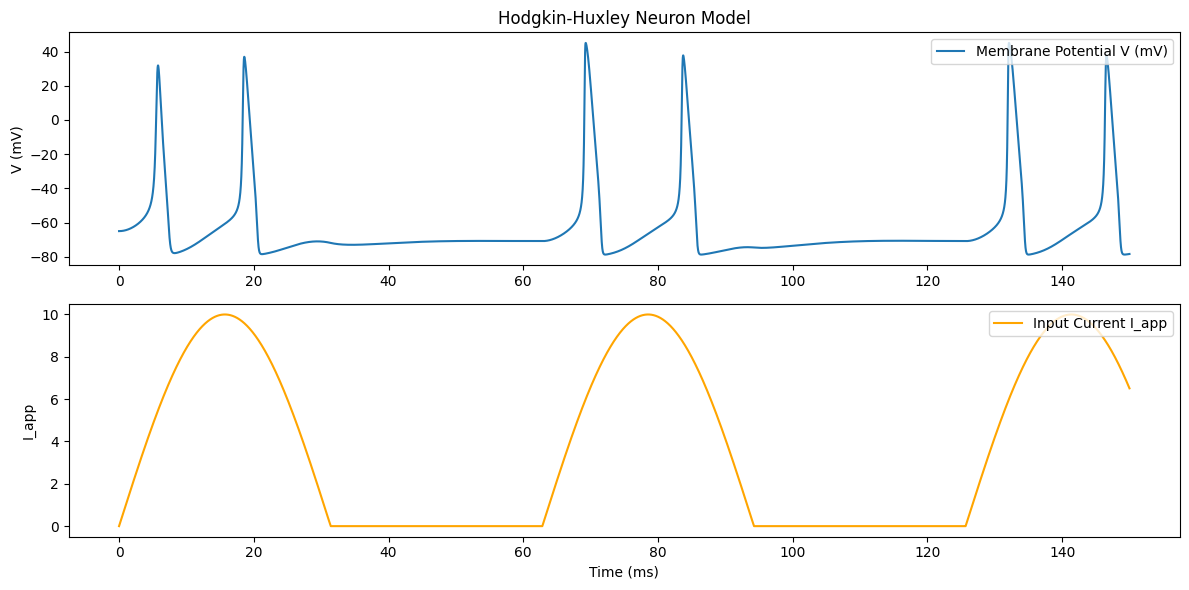

In [ ]:
I_rectified_sine = lambda t: 10.0 * max(np.sin(0.1 * t), 0)
hodgkin_huxley(I_app=I_rectified_sine, time_end=150)

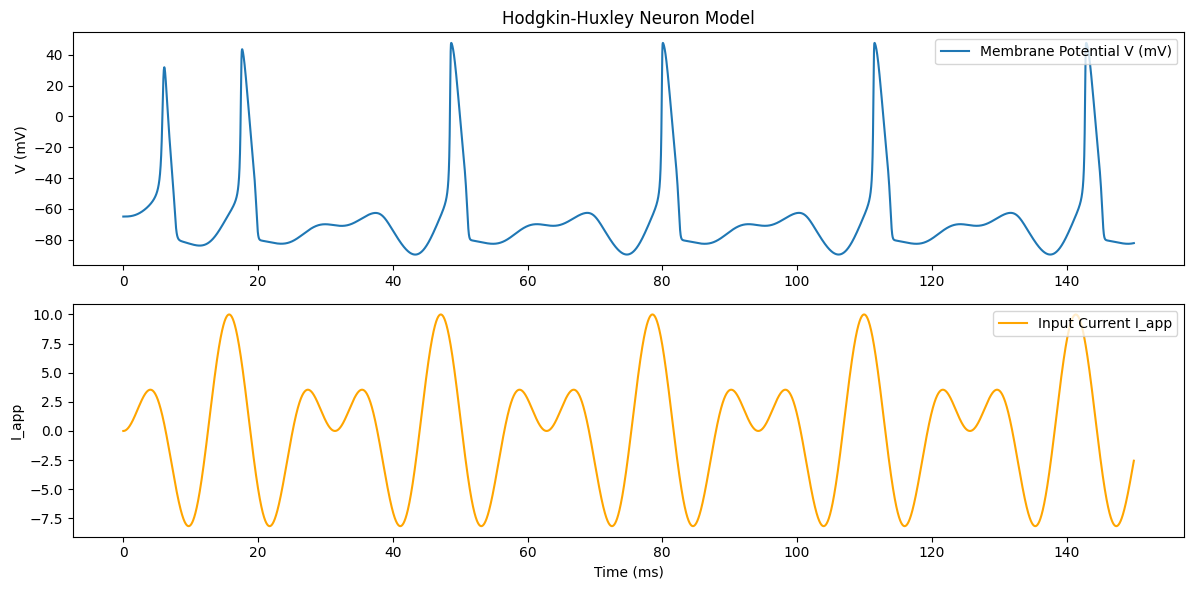

In [ ]:
I_biphasic = lambda t: 10 * np.sin(0.5 * t) * np.sin(0.1 * t)
hodgkin_huxley(I_app=I_biphasic, time_end=150)

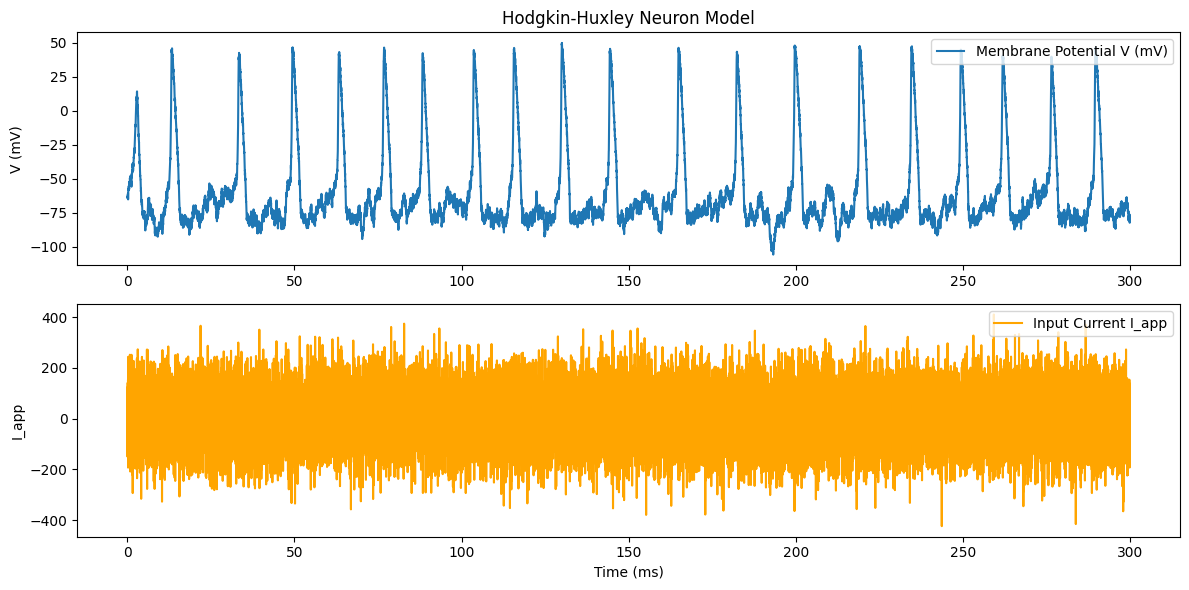

In [ ]:
# Random current
np.random.seed(10)
mean = 5
std_dev = 100
I_random = lambda t: np.random.normal(mean, std_dev)
hodgkin_huxley(I_app=I_random, time_end=300)

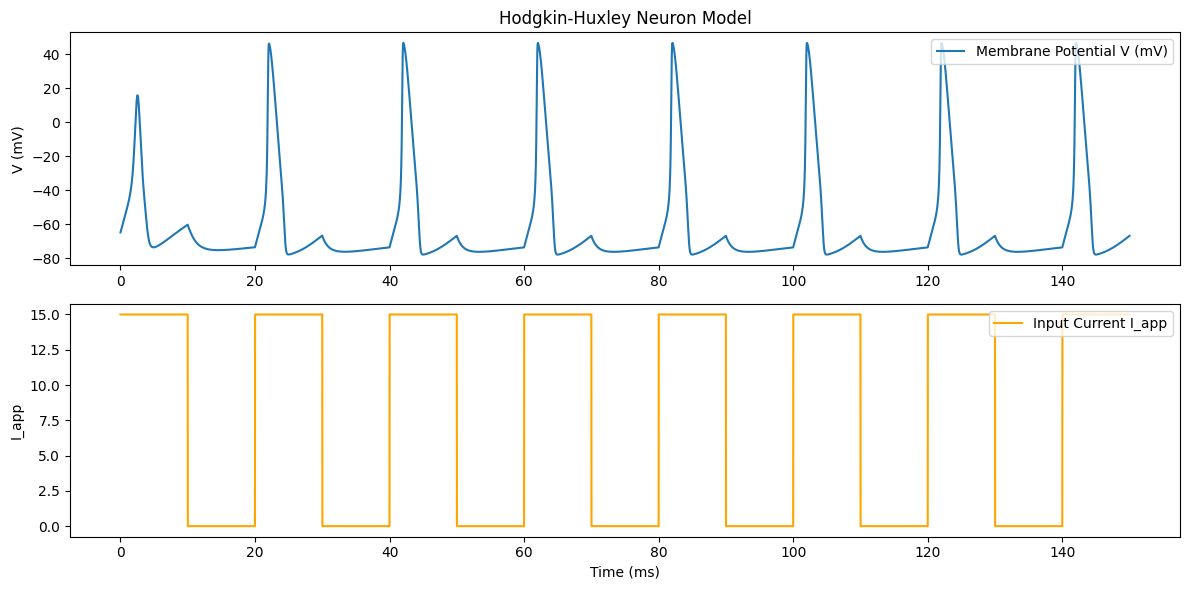

In [ ]:
I_square_wave = lambda t: 15.0 if (int(t) % 20) < 10 else 0
hodgkin_huxley(I_app=I_square_wave, time_end=150)

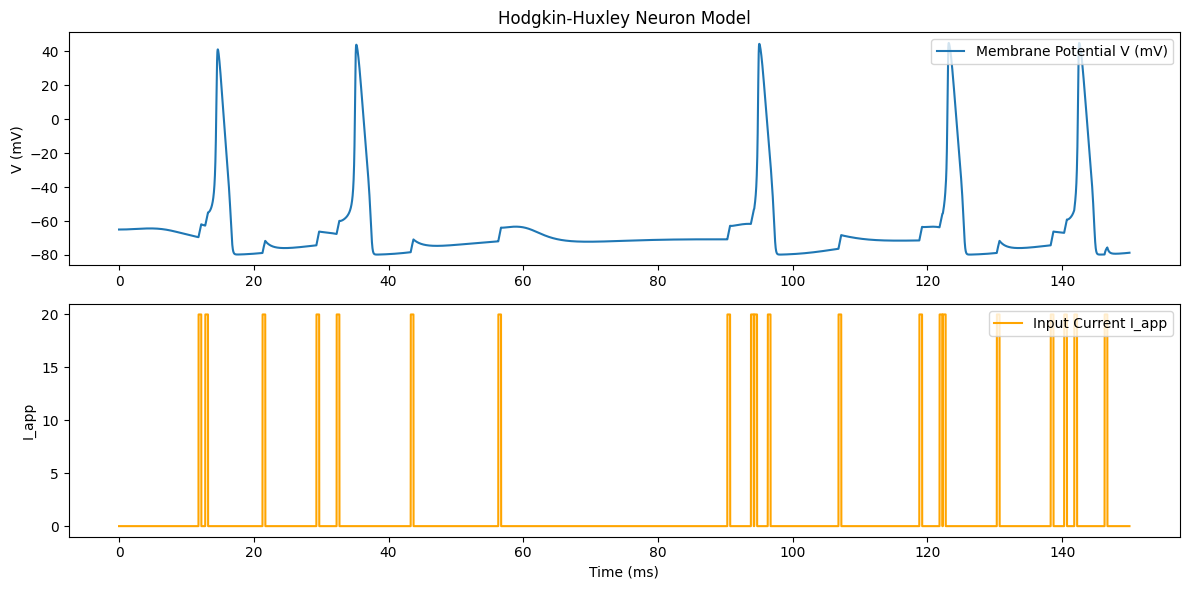

In [ ]:
# Random spike train
#
np.random.seed(10)
total_time = 150
spike_times = np.random.choice(np.arange(0, total_time, 0.5), size=20, replace=False)
I_spike_train = lambda t: 20.0 if np.any(np.isclose(spike_times, t, atol=0.2)) else 0
hodgkin_huxley(I_app=I_spike_train, time_end=total_time)